# import the necessary libries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset=pd.read_csv("churn_Modelling.csv")

In [7]:
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
dataset.shape

(10000, 14)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
dataset.corr()

C:\Users\91931\AppData\Local\Temp\ipykernel_31436\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [56]:
corr=dataset.corr()
corr

C:\Users\91931\AppData\Local\Temp\ipykernel_31436\1091080309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [24]:
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
dataset.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [25]:
dataset.CustomerId.value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [22]:
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## 4.Handing null values

1.delete the nan
2.delete the respective row/col
3.repace with mean median or mode

In [26]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [27]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There  is no need to handle null values
for Example let us assume there are null values in age and gender column

In [55]:
# handing null values in age col(numerical)----mean
dataset[Age].fillna(dataset[Age].mean(),inplace=True)

NameError: name 'Age' is not defined

## 5.Seperate dependent and independent variables

In [29]:
#dataset.iloc[rows,column]
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13:14]

In [30]:
y.shape

(10000, 1)

In [36]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


## 6.Encoding

In [ ]:
1.nominal-->Gender     male             female(arrangement of data not requried)

a.one hot encoding
b.one hot encoding ith many categorical


2.ordinal-->order of data or rank of data 
ex-i want  to predict the salary pf person

a.level encoding 
b.Target guided ordinala encoding


<Axes: >

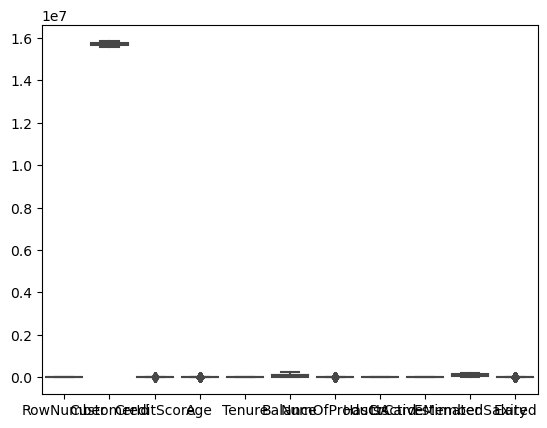

In [32]:
sns.boxplot(dataset)

3.given a dataset named "data" conating the 5 col and 10 row find the output of the below code?
print(len(data.columns))

##### label encodeing on gender columns 

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
x["Gender"]=le.fit_transform(x["Gender"])

In [36]:
x["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

In [38]:
x.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9995,771,France,1,39,5,0.00,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.00,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52
9999,792,France,0,28,4,130142.79,1,1,0,38190.78


### one hot encoding on geography columns

In [ ]:
Geography       france        spain        Germany 
france            1            0               0
germany           0            0               1
Spain             0            1               0

if 100 categiries like this 99 col will be added ----curse of dimensionality

In [40]:
x.shape

(10000, 10)

In [46]:
geography=pd.get_dummies(x["Geography"],drop_first=True)

In [47]:
geograhy

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [48]:
x=pd.concat([x,geography],axis=1)

In [49]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1


In [51]:
x.drop(["Geography"],axis=1,inplace=True)    # geography col is not requried 

In [53]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [54]:
x.shape

(10000, 11)

### 7.Splitting into training and testing set

100 rows
Training data      (70-80)%
Test data          (20-30)%

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test,=train_test_split(x,y,test_size=0.3,random_state=0)

In [61]:
x_train.shape,x_test.shape ,y_train.shape,y_test.shape

((7000, 11), (3000, 11), (7000, 1), (3000, 1))

In [63]:
a=[1,2,3,4,5,6]
b=[1,0,1,5,6,3]
for i in range(5):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3)
    print("without random state",a_train)

with random state [5, 3, 6, 1]
with random state [2, 5, 4, 3]
with random state [4, 2, 6, 5]
with random state [3, 6, 5, 1]
with random state [3, 1, 6, 4]


In [64]:
a_test

[2, 5]

In [68]:
a=[1,2,3,4,5,6]
b=[1,0,1,5,6,3]
for i in range(5):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=100)
    print("with random state",b_train)

with random state [6, 5, 3, 1]
with random state [6, 5, 3, 1]
with random state [6, 5, 3, 1]
with random state [6, 5, 3, 1]
with random state [6, 5, 3, 1]


In [70]:
a=[1,2,3,4,5,6]
b=[1,0,1,5,6,3]
for i in range(5):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3)
    print("without random state",a_test)

without random state [1, 4]
without random state [1, 3]
without random state [2, 4]
without random state [2, 5]
without random state [1, 3]


## 8.Feature Scaling

In [ ]:
Height   cms
weight   kgs

Two type of scaling 
1.Standard Scaling             mean=0 and sd=1
2.min max scaling                 range from 0 to 1

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [72]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [73]:
x_train

array([[-0.09792126,  0.92295821, -0.55759842, ..., -0.76862426,
        -0.56987189, -0.5731713 ],
       [-1.12612023,  0.92295821,  0.01725942, ..., -1.39359887,
        -0.56987189, -0.5731713 ],
       [-0.62230274, -1.08347268,  3.5622161 , ..., -1.49739308,
        -0.56987189, -0.5731713 ],
       ...,
       [ 0.89943174,  0.92295821, -0.36597914, ...,  1.41400417,
        -0.56987189, -0.5731713 ],
       [-0.62230274, -1.08347268, -0.07855022, ...,  0.84625811,
        -0.56987189,  1.74467913],
       [-0.28299708, -1.08347268,  0.87954618, ...,  0.32689267,
         1.75478035, -0.5731713 ]])